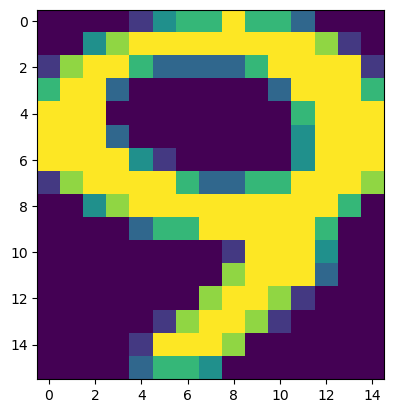

In [1]:
# Machine learning model code goes here
#first load the train and test data set
import os
import pandas as pd
import numpy as np
from visualise import plot_digi_fig
import matplotlib.pyplot as plt
from dataloader import FFT_transform, FFT_transform_PM
import numpy as np
import matplotlib.pyplot as plt

entries = os.listdir('Data/')
#print(entries)
train_data=[k for k in entries if 'train' in k]
#print(train_data)

X_title_train=[]
flat_data_train=[]
X_data_train = []
X_data_train_phase=[]
flat_data_train_phase=[]
for entry in train_data:
    name=entry
    
    res = "".join([ele for ele in entry if ele.isdigit()])  # keep only the integer part of the path
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))  #we keep the raw data
    
            #here we apply the FFT transform
            # mag_val, phase_val = FFT_transform_PM(mat_r)
            #break
            X_data_train.append(mat_r)
            # X_data_train_phase.append(phase_val)
            X_title_train.append(int(res))
            flat_data_train.append(mat_r.flatten())
            # flat_data_train_phase.append(phase_val.flatten())
    #X_data.append (image)
test_data=[k for k in entries if 'test' in k]
#print(test_data)

#create nested lists for storing reasons
X_title_test=[]
X_data_test = []
flat_data_test=[]
X_data_test_phase=[]
flat_data_test_phase=[]
for entry in test_data:
    name=entry
    
    res = "".join([ele for ele in entry if ele.isdigit()])  # keep only the integer part of the path
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))   #we keep the raw data

            # mag_val, phase_val = FFT_transform_PM(mat_r)
            #break
            #magnitude
            X_data_test.append(mat_r)
            # X_data_test_phase.append(phase_val)
            X_title_test.append(int(res))
            flat_data_test.append(mat_r.flatten())
            # flat_data_test_phase.append(phase_val.flatten())
    #X_data.append (image)
    
    
#calculate the labels of the data
'''
res_train=[]
res_train = [sub.replace('.txt', '') for sub in X_title_train]
res_train = [sub.replace('train_', '') for sub in res_train]
res_train = [eval(i) for i in res_train]
X_train_lable=res_train
'''
X_train_lable = X_title_train
'''
res_test=[]
res_test = [sub.replace('.txt', '') for sub in X_title_test]
res_test = [sub.replace('test_', '') for sub in res_test]
res_test = [eval(i) for i in res_test]
X_test_lable=res_test
'''
X_test_lable = X_title_test
#print(res_test)
#print(X_title_train)

In [2]:
x_train=flat_data_train
x_train=np.nan_to_num(x_train)
y_train=X_train_lable
x_test=flat_data_test
x_test=np.nan_to_num(x_test)
y_test=X_test_lable

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\maria\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier: Raw data accuracy:
93.9
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.91      0.99      0.95       100
           2       0.97      0.96      0.96       100
           3       0.98      0.94      0.96       100
           4       0.96      0.92      0.94       100
           5       0.89      0.93      0.91       100
           6       0.95      0.94      0.94       100
           7       0.99      0.94      0.96       100
           8       0.88      0.91      0.89       100
           9       0.90      0.90      0.90       100

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



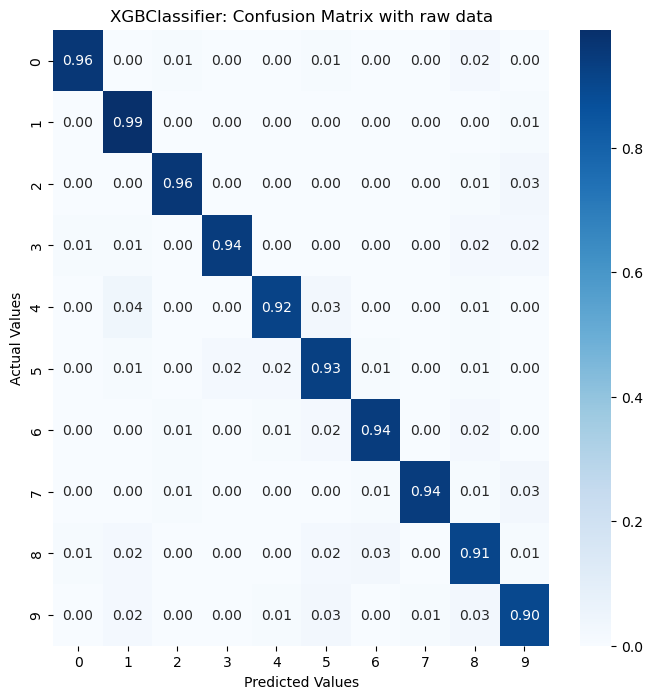

In [3]:
import xgboost as xgb

xgb_model_raw = xgb.XGBClassifier(objective="multi:softmax", random_state=42,num_class=10,
                             learning_rate=0.01, n_estimators=1000,eval_metric='mlogloss' ,
                             max_depth=6, # re-optimized from v2
                             reg_lambda=1 # default L2 value
                            )
xgb_model_raw.fit(x_train,y_train)

y_pred = xgb_model_raw.predict(x_test)
y_test = np.asarray(y_test)
print("XGBClassifier: Raw data accuracy:")
print(round(sum(y_pred==y_test)/len(y_test)*100,1))

cm4 = confusion_matrix(y_test, y_pred,normalize='true')
labels = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_pred)) 
fig, ax = plt.subplots(figsize=(8,8))
sns_plot = sns.heatmap(cm4, annot=True, fmt='.2f', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.title('XGBClassifier: Confusion Matrix with raw data')
plt.show()
fig.savefig('Conf_Matrix_XGBClassifier_raw_data.png',bbox_inches='tight',dpi=150)

